In [29]:
import os
import cv2
import numpy as np
from utils import show_images

def to_8bit(img):
    nowimg = (img - img.min()) / (img.max() - img.min())
    return (nowimg * 255).astype(np.uint8)

In [30]:
# 读取 ATT 数据集，注意要转为灰度图
images, labels = [], []
dirnames = [x for x in os.listdir('./image/faces') if x[0]=='s']
for onedir in dirnames:
    filenames = [y for y in os.listdir(f'./image/faces/{onedir}')]
    for onefile in filenames:
        images.append(cv2.imread(f'./image/faces/{onedir}/{onefile}', cv2.IMREAD_GRAYSCALE))
        labels.append(int(onedir[1:]))
images, labels = np.array(images), np.array(labels)

rows, cols = images[0].shape[0:2]

train_images, train_labels = images[0:-1], labels[0:-1]
test_images, test_labels = images[-1:], labels[-1:]

# If you just want to keep 10 principal components (read Eigenfaces)
# cv2.face.EigenFaceRecognizer.create(10)
# If you want to create a FaceRecognizer with a confidence threshold (e.g. 123.0)
# cv2.face.EigenFaceRecognizer.create(10, 123.0)
# If you want to use _all_ Eigenfaces and have a threshold
# cv2.face.EigenFaceRecognizer.create(0, 123.0)

model0 = cv2.face.EigenFaceRecognizer.create()
model1 = cv2.face.FisherFaceRecognizer.create()

model0.train(train_images, train_labels)
model1.train(train_images, train_labels)

predict_label, predict_confidence = model0.predict(test_images[0])
print(f'Actual: {test_labels[0]}, Predict: {predict_label}')
predict_label, predict_confidence = model1.predict(test_images[0])
print(f'Actual: {test_labels[0]}, Predict: {predict_label}')

Actual: 9, Predict: 9
Actual: 9, Predict: 9


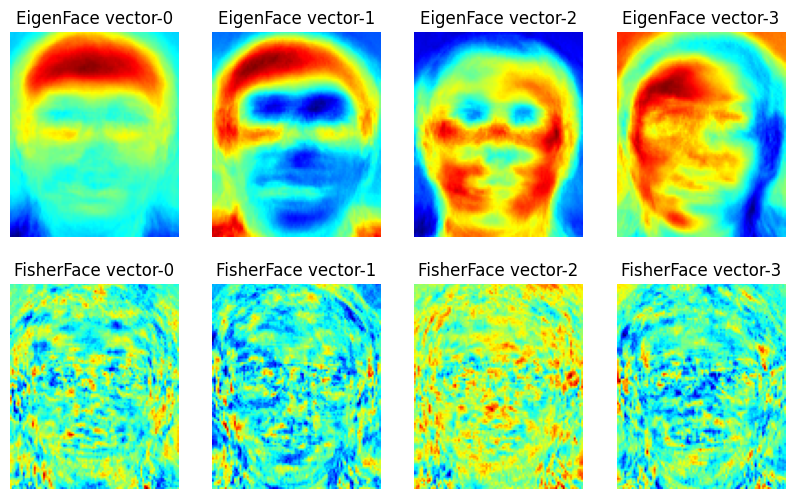

In [34]:
# 可视化显示 EigenFace 和 FisherFace 的前几个特征向量，灰度转为了伪彩色，越红表示越大
# 可看到 EigenFace 很容易受光照影响，有的是左半脸较红，有的是头顶，而这可能因为训练图片左半边光照更多；FisherFace 相对好一点
# 需要注意：只在光线良好的图片上学习 Fisherfaces，然后在光线不好的场景中识别，结果可能会差，因为没有机会学习光照
result = []

# Here is how to get the eigenvalues, eigenvectors of this Eigenfaces model:
eigenvalues0 = model0.getEigenValues()
eigenvectors0 = model0.getEigenVectors()

# Display or save the Eigenfaces:
for idx in range(eigenvectors0.shape[1]):
    if idx > 3:
        break
    img = to_8bit(eigenvectors0[:, idx].reshape(rows, cols))
    img = cv2.applyColorMap(img, cv2.COLORMAP_JET)
    result.append((f'EigenFace vector-{idx}', img))

eigenvalues1 = model1.getEigenValues()
eigenvectors1 = model1.getEigenVectors()

# Display or save the Eigenfaces:
for idx in range(eigenvectors1.shape[1]):
    if idx > 3:
        break
    img = to_8bit(eigenvectors1[:, idx].reshape(rows, cols))
    img = cv2.applyColorMap(img, cv2.COLORMAP_JET)
    result.append((f'FisherFace vector-{idx}', img))

show_images(result)

In [54]:
'''
LBP Histogram
'''
model = cv2.face.LBPHFaceRecognizer.create()
model.train(images, labels)
print('Predict:', model.predict(test_images[0]))

# print(model.getRadius(), model.getNeighbors(), model.getGridX(), model.getGridY(), model.getThreshold())
histograms = model.getHistograms()
# len(histograms) 就是划分的区域总数，每个区域都会统计直方图
print(histograms[0].shape, len(histograms))

Predict: (9, 0.0)
(1, 16384) 400
